## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Print column names
print(list(mouse_metadata))
print(list(study_results))

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
print(f'number of rows: {len(data)}')

# Display the data table for preview
data.head()

['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
number of rows: 1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse = data['Mouse ID']
mice_num = mouse.unique()
print(len(mice_num))

249


In [3]:
# Optional: Get all the data for duplicate mice
duplicates = pd.concat(obs for _, obs in data.groupby(['Mouse ID','Timepoint']) if len(obs) > 1)

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = duplicates['Mouse ID'].unique()

print(duplicate_mice)
duplicates


['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter = data['Mouse ID'] != duplicate_mice[0]
clean_data = data[filter]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data))



1880


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avg = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)':'Mean'})
median = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()).rename(columns={'Tumor Volume (mm3)':'Median'})
variance = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()).rename(columns={'Tumor Volume (mm3)':'Variance'})
std_dev = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()).rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
std_err = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()).rename(columns={'Tumor Volume (mm3)':'Standard Error'})

dfs_to_merge = [avg, median, variance, std_dev, std_err]

stats = reduce(lambda left,right: pd.merge(left,right, on=['Drug Regimen'], how='outer'), dfs_to_merge)
stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_alt = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':['mean','median','var','std','sem']
})
stats_alt = stats_alt.rename(columns={
    'mean':'Mean',
    'median':'Median',
    'var':'Variance',
    'std':'Standard Deviation',
    'sem':'Standard Error'
})

stats_alt

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                             
             Standard Error  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.544332  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

## Bar and Pie Charts

['Propriva', 'Infubinol', 'Ceftamin', 'Placebo', 'Stelasyn', 'Zoniferol', 'Naftisol', 'Ketapril', 'Ramicane', 'Capomulin']


<AxesSubplot:xlabel='Drug Regimen'>

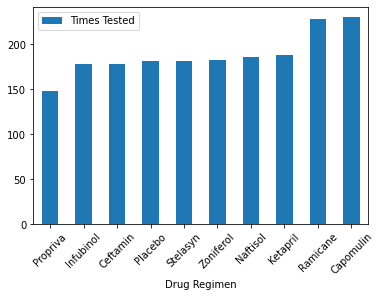

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = clean_data['Drug Regimen'].value_counts(ascending=True)
drug_labels = drug_count.index.to_list()
print(drug_labels)
x_axis = np.arange(len(drug_count))

count_df = pd.DataFrame({'Drug Regimen':drug_labels, 'Times Tested':drug_count})
count_df.plot.bar(x='Drug Regimen', y='Times Tested', rot = 45)


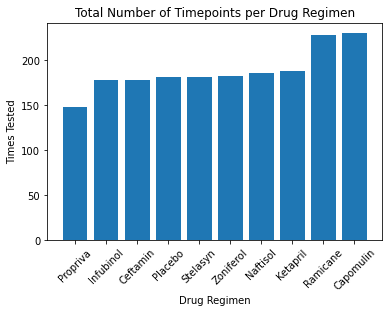

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis,drug_count,align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_labels,rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Times Tested')
plt.title('Total Number of Timepoints per Drug Regimen')
plt.show()

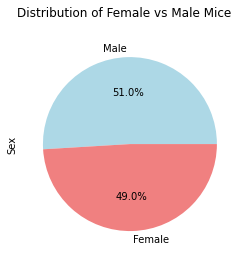

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data['Sex'].value_counts()
sex_labels = sex.index.to_list()
colors = ['lightblue','lightcoral']
sex_title = 'Distribution of Female vs Male Mice'

sex_df = pd.DataFrame({'Sex':sex})
plot = sex_df.plot.pie(subplots=True, colors=colors, legend=False, autopct='%1.1f%%', title=sex_title)


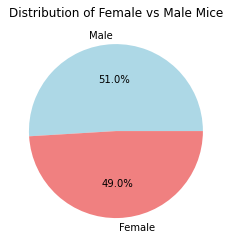

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex_labels, colors=colors, autopct='%1.1f%%')
plt.title(sex_title)
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_filter = clean_data['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])
filtered_df = clean_data[drug_filter]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = filtered_df.groupby(['Mouse ID','Drug Regimen']).agg({'Timepoint': 'max'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_df = pd.merge(max_tumor_df,clean_data[['Mouse ID', 'Tumor Volume (mm3)','Timepoint','Drug Regimen',]],on=['Mouse ID','Timepoint'],how='left')

# Test record
print(max_tumor_df.loc[max_tumor_df['Mouse ID'] == 's185'])

# # Set index to drug regimen
# max_tumor_df.set_index('Drug Regimen', inplace=True, drop=True)

# Print Preview
max_tumor_df.tail()

# dict1 = max_tumor_df.to_dict()
# dict1

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html


   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
70     s185         45           23.343598    Capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane
99,z581,45,62.754451,Infubinol


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = max_tumor_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
result = {}

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filter = max_tumor_df['Drug Regimen'].isin([treatment])
    tumor_vol = max_tumor_df[filter]['Tumor Volume (mm3)'].tolist()
    
    result[treatment] = tumor_vol

plot_data = pd.DataFrame(result)
print(plot_data.head())

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   
# Determine outliers using upper and lower bounds
for treatment in treatments:
    quartiles = plot_data[treatment].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    lower_outlier = [x for x in plot_data[treatment] if x < lower_bound]
    upper_outlier = [x for x in plot_data[treatment] if x > upper_bound]
    
    print(f'{treatment} --------------------------------------')
    print(f'Interquartile range (IQR): {iqr}')
    print(f'Lower outlier: {lower_outlier}')
    print(f'Upper outlier: {upper_outlier}')

   Infubinol   Ceftamin   Ramicane  Capomulin
0  67.973419  62.999356  38.407618  38.982878
1  65.525743  45.000000  43.047543  38.939633
2  57.031862  56.057749  38.810366  30.485985
3  66.083066  55.742829  32.978522  37.074024
4  72.226731  48.722078  38.342008  40.159220
Infubinol --------------------------------------
Interquartile range (IQR): 11.477135160000003
Lower outlier: [36.3213458]
Upper outlier: []
Ceftamin --------------------------------------
Interquartile range (IQR): 15.577752179999997
Lower outlier: []
Upper outlier: []
Ramicane --------------------------------------
Interquartile range (IQR): 9.098536719999998
Lower outlier: []
Upper outlier: []
Capomulin --------------------------------------
Interquartile range (IQR): 7.781863460000004
Lower outlier: []
Upper outlier: []


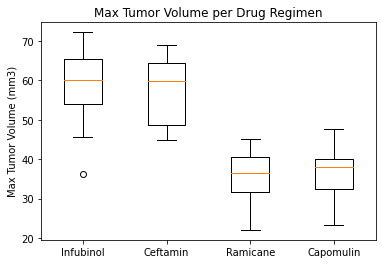

In [104]:
# set subsets
fig1, ax1 = plt.subplots()

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ax1.set_title('Max Tumor Volume per Drug Regimen')
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.boxplot(plot_data)
tick_locations = np.arange(1,len(treatments)+1,1)
plt.xticks(tick_locations,treatments)
plt.show()


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
